In [ ]:
import os
os.chdir('/content/drive/MyDrive/casestudy')

In [ ]:
ls

trainyolo.ipynb  yolov5/


In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%%bash
cd yolov5
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.4/605.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
os.chdir('yolov5')

In [ ]:
ls

benchmarks.py    data.yaml   __pycache__/      setup.cfg
CITATION.cff     detect.py   README.md         train.py
classify/        export.py   README.zh-CN.md   tutorial.ipynb
CONTRIBUTING.md  hubconf.py  requirements.txt  utils/
data/            LICENSE     runs/             val.py
data_images/     models/     segment/          yolov5s.pt


In [ ]:
!python train.py --data data.yaml --cfg yolov5s.yaml --batch-size 8 --name Model --epochs 250

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=250, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=Model, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100

In [ ]:
!python export.py --weights runs/train/Model/weights/best.pt --include onnx --simplify --opset 12

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

export: data=data/coco128.yaml, weights=['runs/train/Model/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=True, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5s summary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

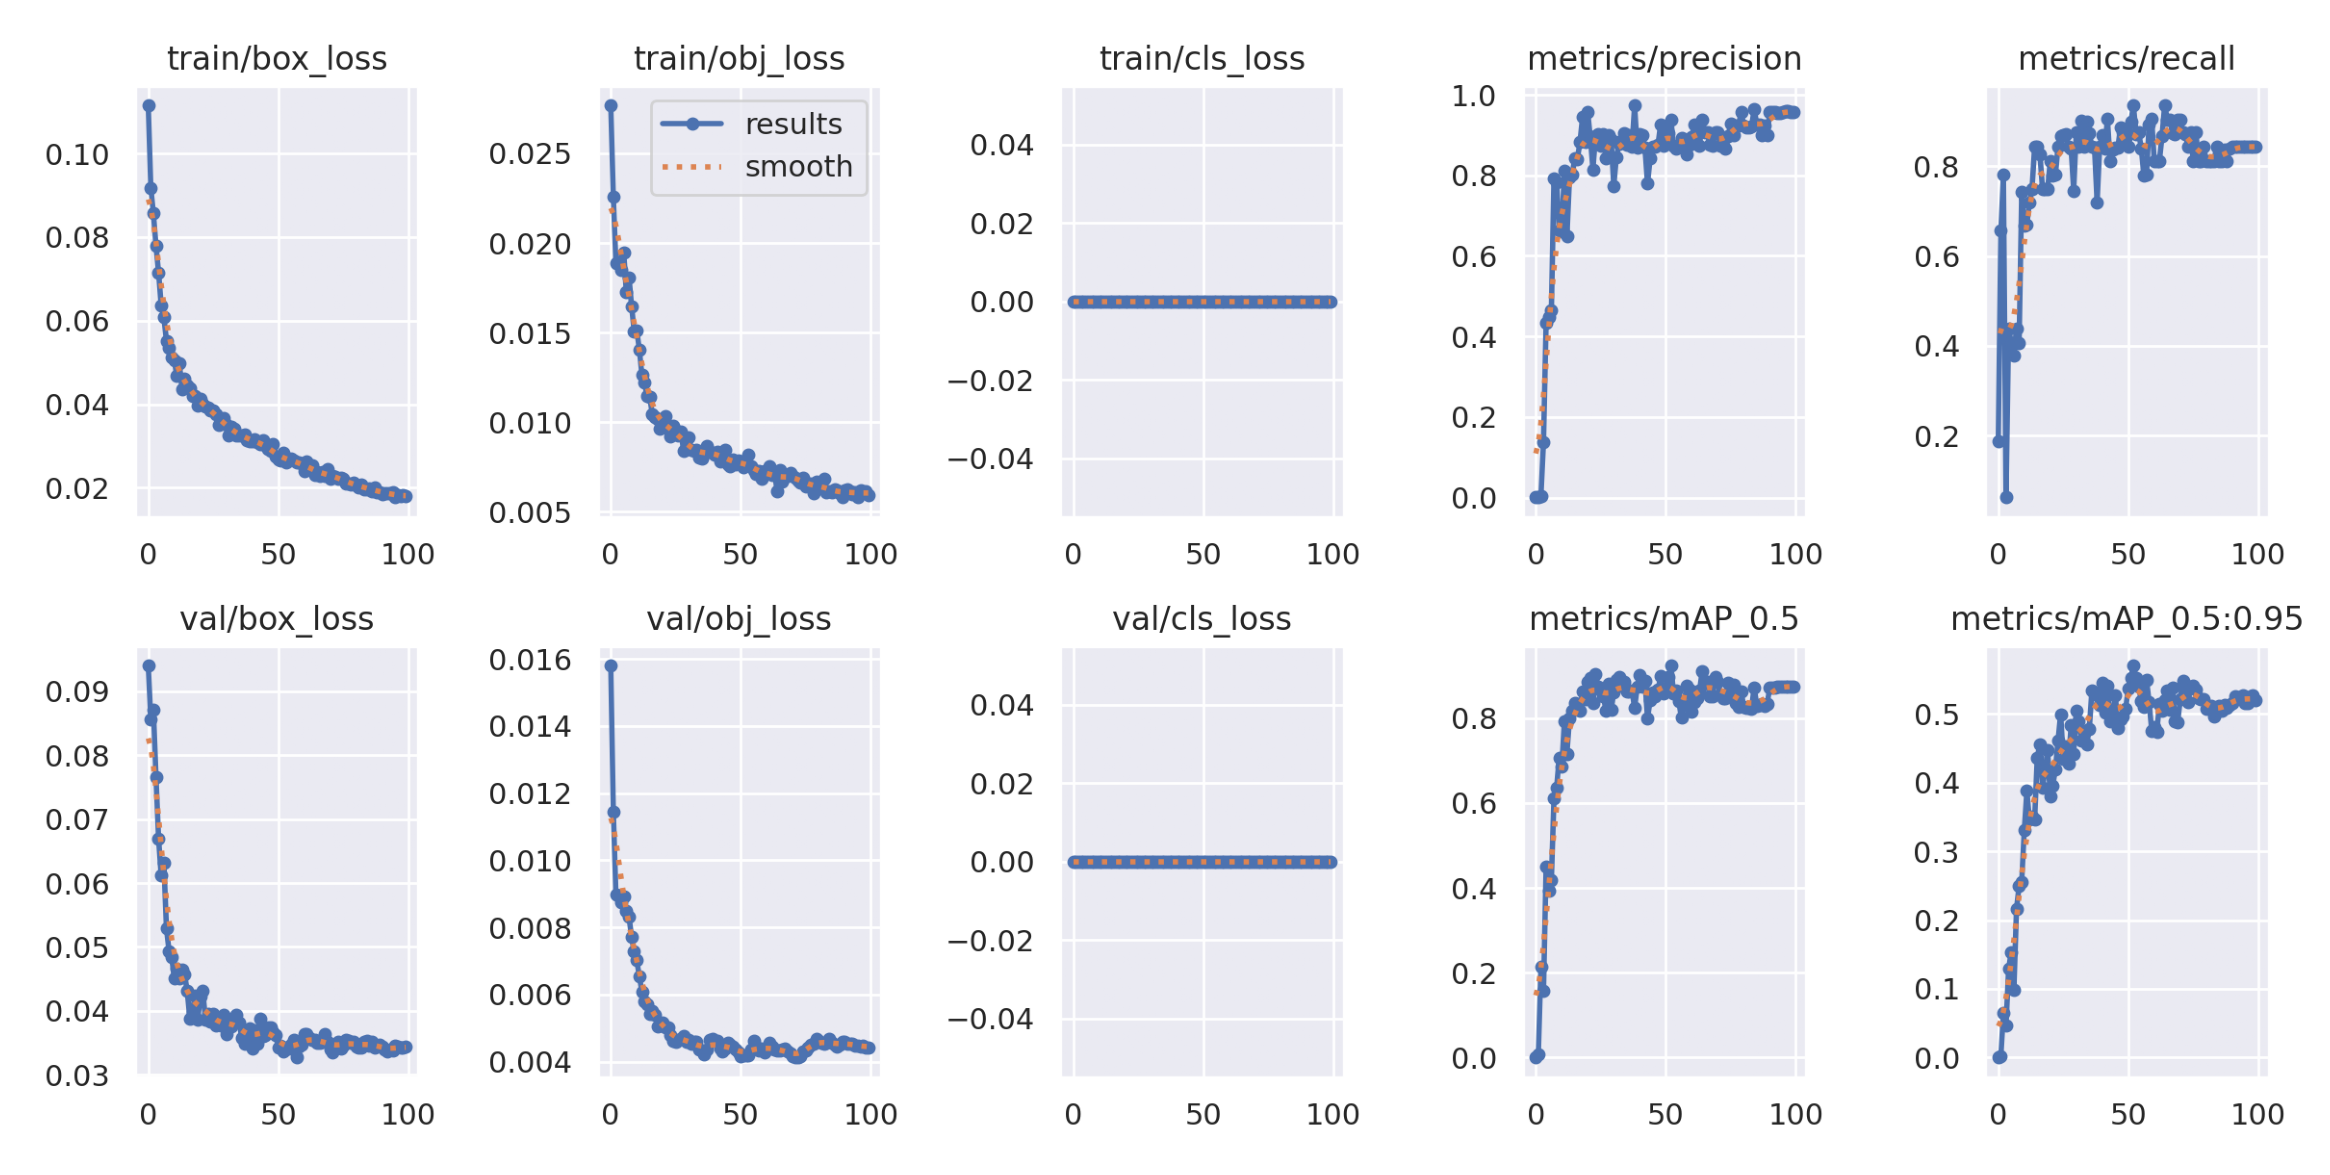

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('/content/drive/MyDrive/casestudy/yolov5/runs/train/Model/results.png'))

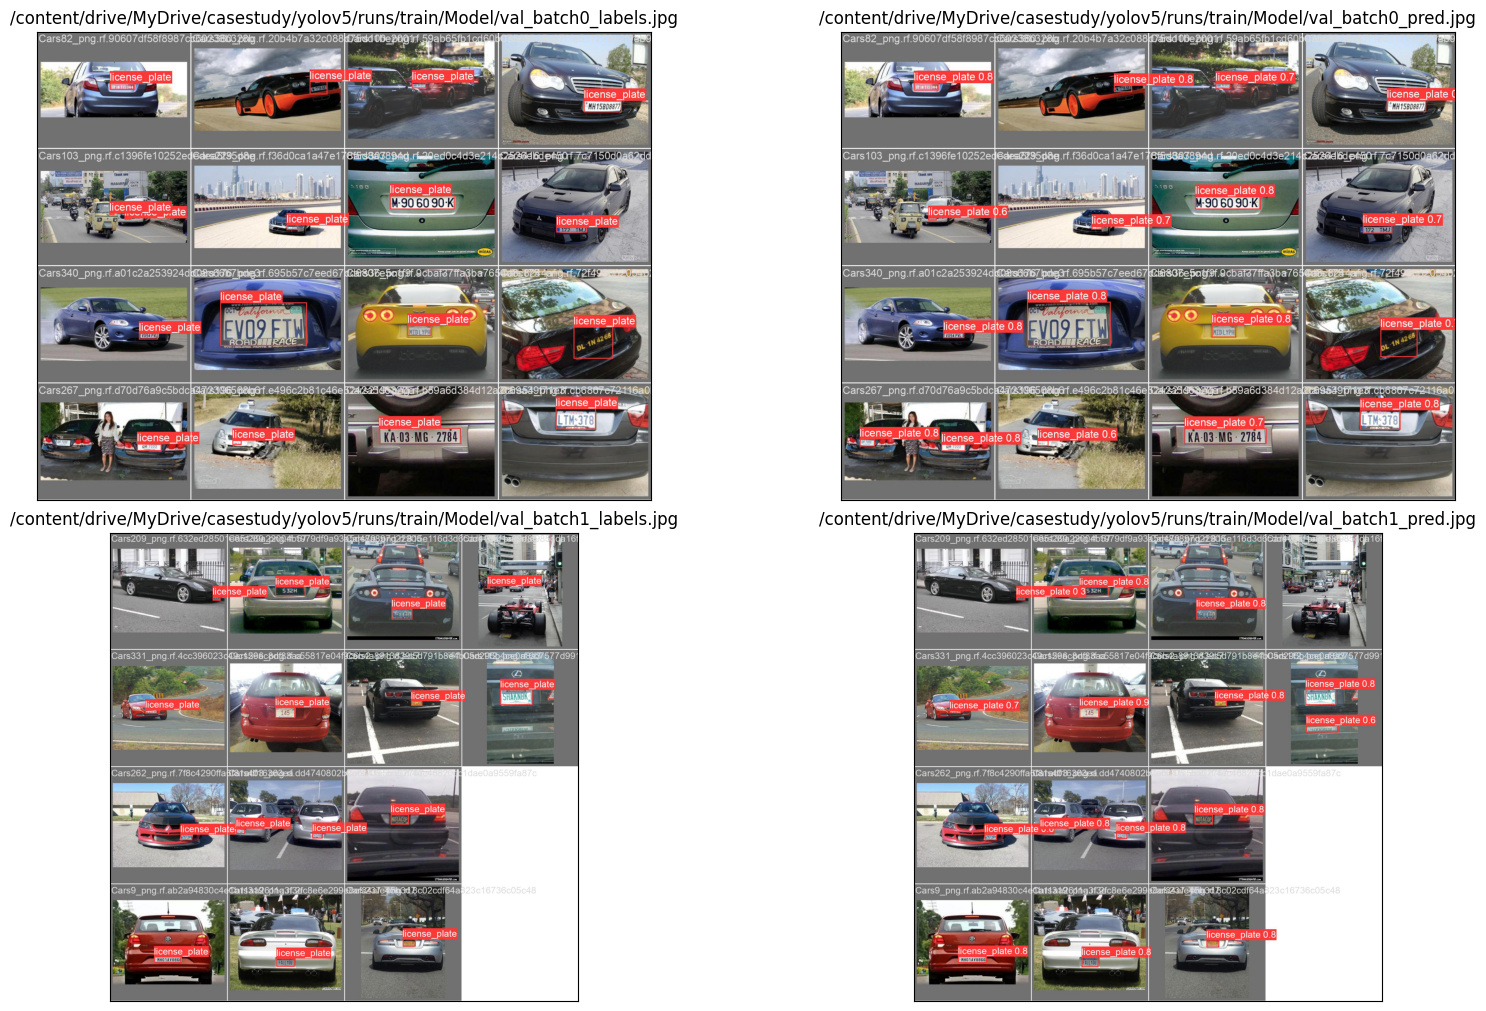

In [2]:
fig, ax = plt.subplots(2, 2, figsize = (2*8,2*5), constrained_layout = True)
for row in range(2):
    ax[row][0].imshow(plt.imread(f'/content/drive/MyDrive/casestudy/yolov5/runs/train/Model/val_batch{row}_labels.jpg'))
    ax[row][0].set_xticks([])
    ax[row][0].set_yticks([])
    ax[row][0].set_title(f'/content/drive/MyDrive/casestudy/yolov5/runs/train/Model/val_batch{row}_labels.jpg', fontsize = 12)

    ax[row][1].imshow(plt.imread(f'/content/drive/MyDrive/casestudy/yolov5/runs/train/Model/val_batch{row}_pred.jpg'))
    ax[row][1].set_xticks([])
    ax[row][1].set_yticks([])
    ax[row][1].set_title(f'/content/drive/MyDrive/casestudy/yolov5/runs/train/Model/val_batch{row}_pred.jpg', fontsize = 12)
plt.show()